## Sea Level

The datafile contains the sea level as a yearly average of 6 station on the Northsea coast of the Netherlands.

A linear trend seems to be the obvious relation.

Demonstration: 
    1. Linear Model
    2. Parameter fit
    3. Autoscaling, Chisq, Standard deviations
    4. Confidence region for the fit

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from PolynomialModel import PolynomialModel

from Fitter import Fitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt

Read the data

In [2]:
tbl = ascii.read( "data/zeespiegel.csv" )
year = tbl['col1'].data
level = tbl['col2'].data


[1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904
 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934
 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014]
[-18.9 -17.3 -16.1 -13.6 -13.6 -16.7 -17.9 -17.3 -13.2 -13.5 -17.1 -19.1
 -21.9 -10.8 -14.6 -17.1 -13.4 -15.7 -16.4 -11.4 -10.4 -12.6  -6.4  -9.3
  -8.1 -11.8  -6.7 -12.2 -12.6 -14.8 -14.3 -11.3 -12.   -9.8 -12.4  -6.9
  -8.7  -8.6  -7.3 -12.6  -7.7  -6.9  -8.4 -13.  -11.5  -6.8  -5.3  -6.9
  -5.5  -9.1  -8.4 -11.9 -10.4  -5.3  -4.3  -5.2  -6.3 -12.3  -5.   -3.6


Define the model

In [3]:
mdl = PolynomialModel( 1 )
print( mdl )


Polynomial: f( x:p ) = p_0 + p_1 * x


define the fitter: Fitter

In [4]:
fitter = Fitter( year, mdl )
 
# find the parameters
param = fitter.fit( level )

  

In [5]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [ -368.897    0.186]
StDevs     : [   14.738    0.008]
Chisq      :  1140.818
Scale      :     3.045
Evidence   :  -305.070
Covar matrix :
[[  217.219   -0.111]
 [   -0.111    0.000]]


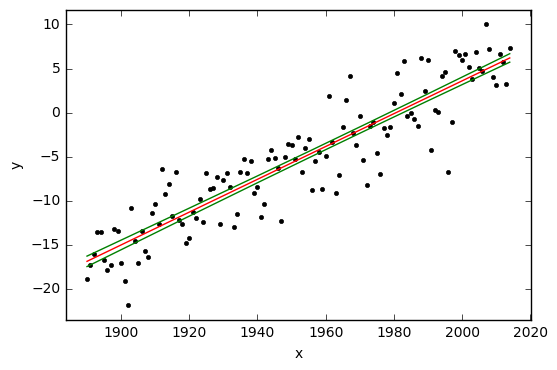

In [7]:
plotFit( year, level, mdl, ftr=fitter )